In [1]:
import pandas as pd
import numpy as np

In [2]:
TextFileReader = pd.read_csv('yelp_review.csv', chunksize=1000)  # the number of rows per chunk
for df in TextFileReader:
    df_review = df
    break

In [3]:
df_review.shape

(1000, 9)

In [4]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [5]:
#Replace NaN with an empty string
df_review['text'] = df_review['text'].fillna('')

In [6]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df_review['text'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(1000, 10122)

In [10]:
feature_names = tfidf.get_feature_names()

In [14]:
feature_names[200:220]

['addicted',
 'addiction',
 'addictive',
 'addicts',
 'adding',
 'addition',
 'additional',
 'additionally',
 'additions',
 'additives',
 'address',
 'addressed',
 'addresses',
 'adds',
 'adequate',
 'adjacent',
 'adjust',
 'adjusted',
 'adjustments',
 'administering']

In [16]:
denselist = tfidf_matrix.todense().tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

,00,000,01,10,100,100s,100th,104,10pm,11,...,zing,ziplining,zipper,zombie,zona,zone,zoo,zucchini,zumba,zuzu
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.138103,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
s = pd.Series(df.loc[4])
s[s > 0].sort_values(ascending=False)[:5]

light        0.381781
chocolaty    0.320485
latté        0.320485
port         0.302476
almond       0.279787
croissant    0.279787
buttery      0.264843
heading      0.230992
chocolate    0.193359
spot         0.180265
Name: 4, dtype: float64

In [19]:
df_review.head(2)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0


In [59]:
df_grouped = df_review.groupby(['user_id'])['text'].sum()
df_grouped.head(5)

user_id
3DQaXFbn_UPB552NwYX-xg    Overall, the gym is good compared to many othe...
3wB-JjsUjkvdNUDRnChsVg    Staying at the hotel made it so we got in for ...
40OP-bcwLep3I1nHNJFXOg    The quality of the food is great, they are spe...
4DvHNL2g_H3onCpV2zjegQ    HP wanted $300 to replace a 500GB hard drive. ...
5V8eXkTJb6IejJkMDaj_Bw    Yum! This place hit the spot last night. I had...
Name: text, dtype: object

In [60]:
df_grouped = df_grouped.to_frame()
print(df_grouped.shape)
df_grouped.columns

(45, 1)


Index(['text'], dtype='object')

In [61]:
def clean_data(s):
    return str.lower(s)
df_grouped['text'] = df_grouped['text'].apply(clean_data)

In [62]:
df_grouped.head(2)

,text
user_id,
3DQaXFbn_UPB552NwYX-xg,"overall, the gym is good compared to many othe..."
3wB-JjsUjkvdNUDRnChsVg,staying at the hotel made it so we got in for ...


In [63]:
tfidf_grp = TfidfVectorizer(stop_words='english')
tfidf_grp_matrix = tfidf_grp.fit_transform(df_grouped['text'])

In [64]:
tfidf_grp_matrix.shape

(45, 10148)

In [65]:
grp_feat_names = tfidf_grp.get_feature_names()
dense_grp_list = tfidf_grp_matrix.todense().tolist()

In [66]:
df_features = pd.DataFrame(dense_grp_list, columns=grp_feat_names)
df_features.head(2)

,00,000,01,10,100,100s,100th,104,10pm,11,...,zing,ziplining,zipper,zombie,zona,zone,zoo,zucchini,zumba,zuzu
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.003753,0.004403,0.0,0.0,0.006623,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
## Did this step because later np.sort was failing for index 40 onwards. Noticed the last element was an array
l = df_features.iloc[40].to_list()
print (l)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10021070321092432, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11110390067306129, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07744725768164394, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [78]:
with open('features.txt', 'w') as f:
    f.writelines(["%s " %item  for item in df_features.columns])

In [47]:
df_features.describe()

,00,000,01,10,100,100s,100th,104,10pm,11,...,zing,ziplining,zipper,zombie,zona,zone,zoo,zucchini,zumba,zuzu
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.003384,0.004901,0.000686,0.007431,0.002363,0.000079,0.000045,0.000147,0.000158,0.004004,...,0.000079,0.000227,0.000227,0.000158,0.000079,0.000255,0.000079,0.000376,0.000090,0.000158
std,0.014516,0.032389,0.004602,0.019431,0.010584,0.000531,0.000301,0.000987,0.001063,0.025024,...,0.000531,0.001521,0.001521,0.001063,0.000531,0.001457,0.000531,0.001782,0.000602,0.001063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.085244,0.217322,0.030869,0.093759,0.070214,0.003565,0.002019,0.006623,0.007130,0.167990,...,0.003565,0.010202,0.010202,0.007130,0.003565,0.009646,0.003565,0.009646,0.004038,0.007130


In [68]:
sorted_features = df_features.apply(np.sort, axis = 1)

In [71]:
df_sorted_features = sorted_features.to_frame()
df_sorted_features.head(2)

,0
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [83]:
df_sorted_features['top_20'] = df_sorted_features[0].apply(lambda l: l[-100:])
df_sorted_features['total'] = df_sorted_features[0].apply(lambda l: sum(l))
df_sorted_features.head(2)

,0,top_5,total,top_20
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.16700817070079932, 0.18396256970422278, 0.1...",11.055588,"[0.055511967212296, 0.055511967212296, 0.05551..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.15464689903415516, 0.1629428122651492, 0.22...",21.838075,"[0.03753378395017689, 0.03753378395017689, 0.0..."


In [109]:
from matplotlib import pyplot
%matplotlib inline

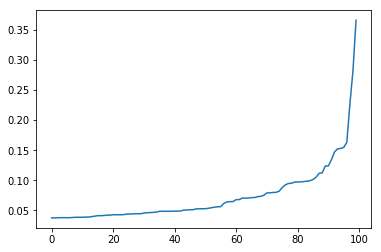

In [116]:
x = np.arange(0,100)
pyplot.plot(x, df_sorted_features.iloc[1,3])

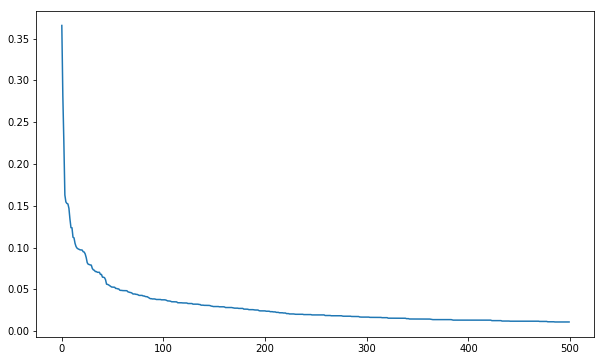

In [120]:
s = pd.Series(df_sorted_features.iloc[1,0])
s = s[s > 0].sort_values(ascending=False)[:500]
x = np.arange(0,len(s))
pyplot.figure(figsize=(10,6))
pyplot.plot(x, s)
# pyplot.xticks(np.arange(0,500,step=20))
pyplot.show()

In [128]:
print(df_sorted_features.shape)
df_sorted_features.head(5)

(45, 4)


,0,top_5,total,top_20
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.16700817070079932, 0.18396256970422278, 0.1...",11.055588,"[0.055511967212296, 0.055511967212296, 0.05551..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.15464689903415516, 0.1629428122651492, 0.22...",21.838075,"[0.03753378395017689, 0.03753378395017689, 0.0..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.15872251941897575, 0.15872251941897575, 0.2...",9.241400,"[0.050686740078931695, 0.05227777288025479, 0...."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1586207870864461, 0.1586207870864461, 0.158...",7.783662,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.13413272682999872, 0.16285995546778997, 0.1...",34.530897,"[0.04316231035434726, 0.043704429297871564, 0...."


In [158]:
df_sorted_features['top_100'] = df_sorted_features['top_20'].apply(np.flip)
df_sorted_features.head(2)

,0,top_5,total,top_20,top_100
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.16700817070079932, 0.18396256970422278, 0.1...",11.055588,"[0.055511967212296, 0.055511967212296, 0.05551...","[0.2656684342740034, 0.19500690494795098, 0.18..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.15464689903415516, 0.1629428122651492, 0.22...",21.838075,"[0.03753378395017689, 0.03753378395017689, 0.0...","[0.3657521897791923, 0.2816098763212797, 0.226..."


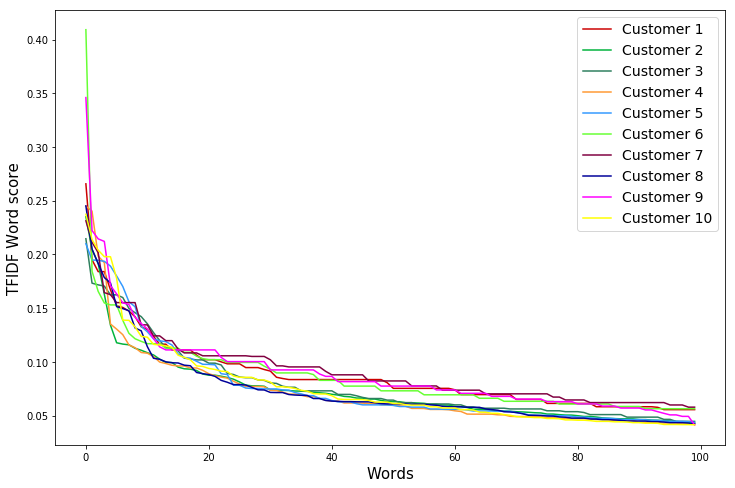

In [163]:
x = np.arange(0,100)
pyplot.figure(figsize=(12,8))
pyplot.plot(x, df_sorted_features.iloc[0,4], label='Customer 1', color='#cc0000')
pyplot.plot(x, df_sorted_features.iloc[4,4], label='Customer 2', color='#00b33c')
pyplot.plot(x, df_sorted_features.iloc[8,4], label='Customer 3', color='#2d7f5e')
pyplot.plot(x, df_sorted_features.iloc[18,4], label='Customer 4',color='#ff9933')
pyplot.plot(x, df_sorted_features.iloc[20,4], label='Customer 5',color='#3399ff')
pyplot.plot(x, df_sorted_features.iloc[24,4], label='Customer 6',color='#66ff33')
pyplot.plot(x, df_sorted_features.iloc[27,4], label='Customer 7',color='#800040')
pyplot.plot(x, df_sorted_features.iloc[35,4], label='Customer 8',color='#000099')
pyplot.plot(x, df_sorted_features.iloc[40,4], label='Customer 9',color='#ff00ff')
pyplot.plot(x, df_sorted_features.iloc[42,4], label='Customer 10',color='#ffff00')
pyplot.legend(loc='upper right',fontsize=14)
pyplot.xlabel('Words', fontsize=15)
pyplot.ylabel('TFIDF Word score', fontsize=15)
pyplot.savefig('review_words.png')